In [1]:
import numpy as np;
import pandas as pd;
from matplotlib import pyplot as plt;

df = pd.read_csv(r"C:\Users\Raider\Downloads\iris.csv");
df.variety.unique()
df.variety = df.variety.replace({"Setosa":1,"Versicolor":2,"Virginica":3})
X = df.drop(['variety'], axis = 1)
Y = df.variety

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

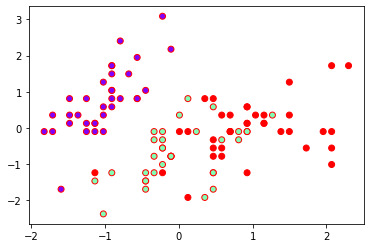

In [2]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='rainbow',edgecolors='r')

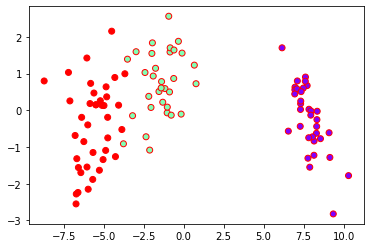

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis(n_components = 2);
x_train = model.fit_transform(x_train, y_train)
x_test = model.transform(x_test)

plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='rainbow',edgecolors='r')

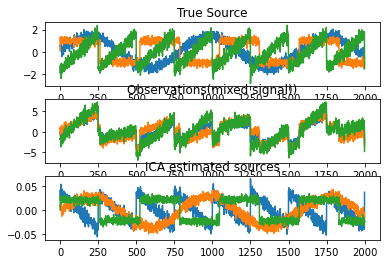

In [4]:
from scipy import signal
from sklearn.decomposition import FastICA, PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

plt.figure()
plt.subplot(3,1,1)
plt.plot(S)
plt.title('True Source')
plt.subplot(3,1,2)
plt.plot(X)
plt.title('Observations(mixed signal))')
plt.subplot(3,1,3)
plt.plot(S_)
plt.title('ICA estimated sources')

plt.show()

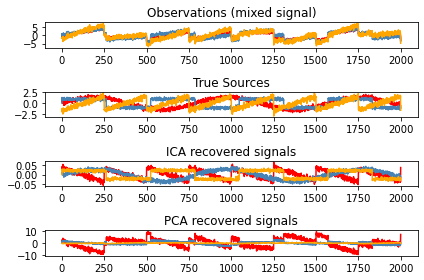

In [5]:
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

# #############################################################################
# Plot results

plt.figure()

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

In [7]:
!pip install pydub
from pydub import AudioSegment
import IPython
import numpy as np
import wave
import sys

mix_1_wave= wave.open(r'C:\Users\Raider\Downloads\ICA mix 1.wav')

In [8]:
mix_1_wave.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')

In [9]:
264515/44100

5.998072562358277

In [10]:
# Extract Raw Audio from Wav File
signal_1 = mix_1_wave.readframes(-1)
signal_1 = np.frombuffer(signal_1,np.int16)

In [11]:
'length: ', len(signal_1) , 'first 100 elements: ',signal_1[:100]

('length: ',
 264515,
 'first 100 elements: ',
 array([  879,  1268,  1460,  1756,  1943,  2216,  2407,  2668,  2866,
         3106,  3308,  3546,  3752,  3981,  4175,  4395,  4588,  4790,
         4966,  5146,  5292,  5436,  5550,  5643,  5717,  5759,  5790,
         5798,  5789,  5756,  5713,  5649,  5576,  5478,  5381,  5267,
         5146,  4999,  4856,  4682,  4502,  4308,  4097,  3875,  3637,
         3380,  3107,  2825,  2514,  2194,  1847,  1472,  1087,   671,
          227,  -219,  -691, -1176, -1666, -2167, -2669, -3179, -3668,
        -4170, -4643, -5116, -5559, -5985, -6380, -6765, -7105, -7422,
        -7706, -7955, -8163, -8339, -8470, -8557, -8600, -8618, -8585,
        -8524, -8425, -8298, -8129, -7947, -7720, -7475, -7205, -6916,
        -6606, -6266, -5922, -5556, -5165, -4774, -4353, -3922, -3476,
        -3021], dtype=int16))

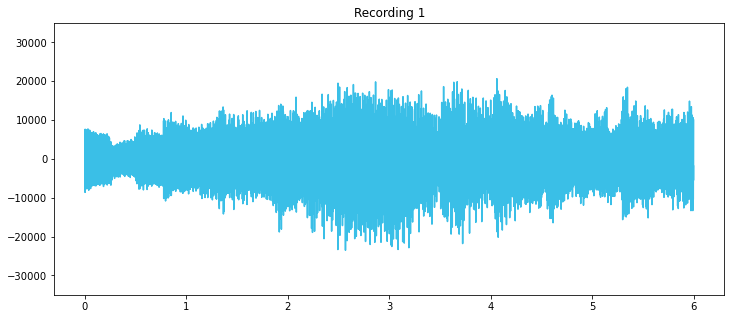

In [12]:
import matplotlib.pyplot as plt

fs = mix_1_wave.getframerate()
timing = np.linspace(0, len(signal_1)/fs, num=len(signal_1))


plt.figure(figsize=(12,5))
plt.title('Recording 1')
plt.plot(timing,signal_1, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show()

<ipython-input-13-b60da631bb96>:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal_2 = np.fromstring(signal_2, np.int16)
<ipython-input-13-b60da631bb96>:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal_3 = np.fromstring(signal_3, np.int16)


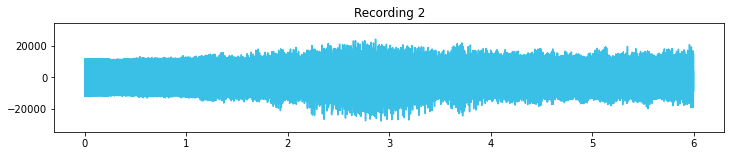

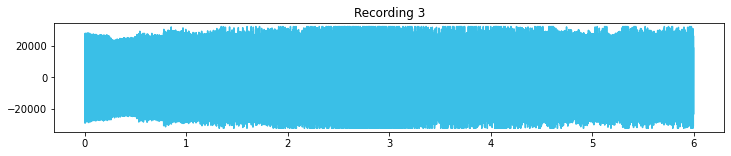

In [13]:
mix_2_wave= wave.open(r'C:\Users\Raider\Downloads\ICA mix 2.wav')

#Extract Raw Audio from Wav File
signal_2 = mix_2_wave.readframes(-1)
signal_2 = np.fromstring(signal_2, np.int16)

mix_3_wave= wave.open(r'C:\Users\Raider\Downloads\ICA mix 3.wav')

#Extract Raw Audio from Wav File
signal_3 = mix_3_wave.readframes(-1)
signal_3 = np.fromstring(signal_3, np.int16)

plt.figure(figsize=(12,2))
plt.title('Recording 2')
plt.plot(timing,signal_2, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show()


plt.figure(figsize=(12,2))
plt.title('Recording 3')
plt.plot(timing,signal_3, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show()

In [14]:
IPython.display.Audio(r'C:\Users\Raider\Downloads\ICA mix 1.wav')

In [15]:
IPython.display.Audio(r'C:\Users\Raider\Downloads\ICA mix 2.wav')

In [16]:
IPython.display.Audio(r'C:\Users\Raider\Downloads\ICA mix 3.wav')

In [17]:
X = list(zip(signal_1, signal_2, signal_3))

# Let's peak at what X looks like
X[:10]

[(879, 157, 879),
 (1268, 899, 2584),
 (1460, 1610, 4081),
 (1756, 2325, 5682),
 (1943, 3022, 7147),
 (2216, 3718, 8689),
 (2407, 4386, 10114),
 (2668, 5056, 11583),
 (2866, 5690, 12954),
 (3106, 6318, 14327)]

In [18]:
from sklearn.decomposition import FastICA

# Initializing FastICA with n_components=3
ica = FastICA(n_components=3)

# Running the FastICA algorithm using fit_transform on dataset X
ica_result = ica.fit_transform(X)
ica_result.shape

(264515, 3)

In [19]:
result_signal_1 = ica_result[:,0]
result_signal_2 = ica_result[:,1]
result_signal_3 = ica_result[:,2]

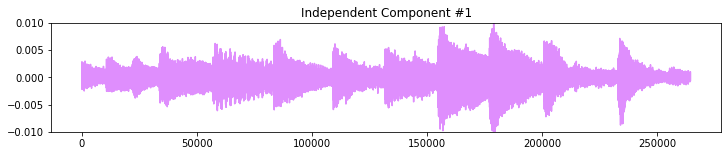

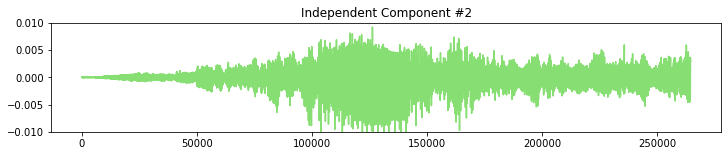

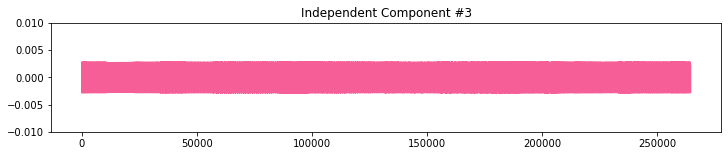

In [20]:
# Independent Component #1
plt.figure(figsize=(12,2))
plt.title('Independent Component #1')
plt.plot(result_signal_1, c="#df8efd")
plt.ylim(-0.010, 0.010)
plt.show()

# Independent Component #2
plt.figure(figsize=(12,2))
plt.title('Independent Component #2')
plt.plot(result_signal_2, c="#87de72")
plt.ylim(-0.010, 0.010)
plt.show()

# Independent Component #3
plt.figure(figsize=(12,2))
plt.title('Independent Component #3')
plt.plot(result_signal_3, c="#f65e97")
plt.ylim(-0.010, 0.010)
plt.show()

In [21]:
from scipy.io import wavfile

# Converting to int, mapping the appropriate range, and increasing the volume a little bit
result_signal_1_int = np.int16(result_signal_1*32767*100)
result_signal_2_int = np.int16(result_signal_2*32767*100)
result_signal_3_int = np.int16(result_signal_3*32767*100)


# Writing wave files
wavfile.write("result_signal_1.wav", fs, result_signal_1_int)
wavfile.write("result_signal_2.wav", fs, result_signal_2_int)
wavfile.write("result_signal_3.wav", fs, result_signal_3_int)

In [22]:
IPython.display.Audio("result_signal_1.wav")

In [23]:
IPython.display.Audio("result_signal_2.wav")

In [24]:
IPython.display.Audio("result_signal_3.wav")